# Science media study 1

Paradigm:
* Name a finding about human behavior they have heard about and describe what they remember
* Explain where they initially learned about it
* Find a link to an article about this particular finding

Each participant can include up to 10 findings, but must provide at least 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import nltk

In [2]:
data_short = pd.read_csv('./PsychFindings - MTurk (v1) - Copy_December 20, 2017_09.12.csv', encoding = "ISO-8859-1")
data_short = data_short[7:] # eliminates initial tests

# individual exclusions - 6 for now
data_short = data_short[data_short.random != '7302'] #another tester in there
data_short = data_short[data_short.random != '2729'] #seemed like a bot
data_short = data_short[data_short.random != '9319'] #finding listed was just 'psychology'
data_short = data_short[data_short.random != '7648'] #finding listed was 'neurons and synapses'
data_short = data_short[data_short.random != '9708'] #'memory storage'
data_short = data_short[data_short.random != '9146'] #one finding was 'global warming'
data_short = data_short[data_short.random != '7795'] #1-word responses

data_short

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,numSemesters,nativeEnglish,fluent,mathClasses,advancedMath,job,mathJob,workerID,workerId,random
7,12/14/17 10:28,12/14/17 10:48,IP Address,*******,100,1194,TRUE,12/14/17 10:48,R_3Hjpdl9BCgCIcvl,*******,...,5 or more,Yes,Yes,"algebra, high school trig,high school calculus...",calcula,Office and Administrative Support Occupations,Daily,NaN,NaN,5268
8,12/14/17 11:37,12/14/17 11:50,IP Address,*******,100,763,TRUE,12/14/17 11:50,R_2VydGOC1M3owY71,*******,...,5 or more,Yes,Yes,"Precalculus, geometry, trigonometry, AP Calcul...",Calculus IV (multivariable),Architecture and Engineering Occupations,Daily,NaN,NaN,1258
9,12/14/17 11:59,12/14/17 12:13,IP Address,*******,100,836,TRUE,12/14/17 12:13,R_3IWrLduGGk4nIqi,*******,...,5 or more,Yes,Yes,"Algebra, trig., calculus",Calculus,Other,Less than once a year,NaN,NaN,4124
10,12/14/17 12:16,12/14/17 12:21,IP Address,*******,100,271,TRUE,12/14/17 12:21,R_1rPMSGsKDao2GMA,*******,...,5 or more,Yes,Yes,no,Pre-Calculus,Office and Administrative Support Occupations,Daily,NaN,NaN,3156
11,12/14/17 12:42,12/14/17 12:44,IP Address,*******,100,163,TRUE,12/14/17 12:44,R_1QsGkZVy0KFkEOK,*******,...,5 or more,Yes,Yes,"calculus, geometry, algebra, statistics",calculus 2,Healthcare Practitioners and Technical Occupat...,Hourly,NaN,NaN,5258
12,12/14/17 12:35,12/14/17 12:47,IP Address,*******,100,687,TRUE,12/14/17 12:47,R_9BORtNcZ9aGm8fL,*******,...,5 or more,Yes,Yes,"Algebra I, Algebra II, Advanced Math, Geometry...",Psychological Statistics,Legal Occupations,Weekly,NaN,NaN,2084
13,12/14/17 13:10,12/14/17 13:12,IP Address,*******,100,154,TRUE,12/14/17 13:12,R_3nNon4m1rPYK7Qt,*******,...,4,Yes,Yes,statistics,statistics,Building and Grounds Cleaning and Maintenance ...,Daily,NaN,NaN,3225
14,12/14/17 13:32,12/14/17 13:36,IP Address,*******,100,230,TRUE,12/14/17 13:36,R_3nOD6XyZN4wXkBh,*******,...,3,Yes,Yes,"Geometry, algebra 1, algebra 2, pre-algebra",algebra 2,Food Preparation and Serving Related Occupations,Weekly,NaN,NaN,5653
15,12/14/17 13:37,12/14/17 13:43,IP Address,*******,100,326,TRUE,12/14/17 13:43,R_3PnJRyJuKMCUuem,*******,...,5 or more,Yes,Yes,"algebra, algebra ii, geometry, trigonometry, c...",linear algebra,Business and Financial Operations Occupations,Daily,NaN,NaN,5265
16,12/14/17 14:36,12/14/17 14:43,IP Address,*******,100,404,TRUE,12/14/17 14:43,R_pAgfwZEYmZ3Uun7,*******,...,5 or more,Yes,Yes,"Calc 1-3, Diff Equations, Trig, Algebra 2, Adv...",Calc 3,Computer and Mathematical Occupations,Daily,NaN,NaN,2040


## Basic dems and stats on dataset and participants

In [3]:
# how many people opted to share more than one finding
len(data_short[data_short.Q1share == 'Yes'])

38

In [4]:
# gender breakdown
data_short.gender.value_counts()

Female    59
Male      35
Name: gender, dtype: int64

In [5]:
# mean age
data_short.age.astype(int).mean()

34.319148936170215

In [6]:
# how many are fluent in English
data_short.fluent.value_counts()

Yes    94
Name: fluent, dtype: int64

In [7]:
# average time to complete survey
data_short['Duration (in seconds)'].astype(int).mean()/60

8.429609929078014

## Looking now at longform data (one line per finding rather than per participant)

In [8]:
data = pd.read_csv('./PsychFindings_longformdata.csv', encoding = "ISO-8859-1")
data

,Q1,Q1descr,Q1share,where1,link1,random
0,"IT's not a recent one, but the first thing tha...","I don't remember the exact sources, but it's t...",Yes,"It was a long times agao, biology class in hig...",https://www.livescience.com/59335-adults-who-l...,5268
1,That the size of the human brain changes with ...,I remember reading that the human brain starts...,Yes,"Again, a long time ago, a biology class in col...",http://www.sciencemag.org/news/2011/07/incredi...,5268
2,"That DNA, and more directly the hormones and c...",Certain genes/dna can result in the production...,No,"Many sources, most like on the news as a defen...",https://www.reuters.com/article/us-delinquents...,5268
3,Serotonin reuptake is a major factor in depres...,People with depression reuptake serotonin at a...,Yes,"My psychiatrist, a few studies on JSTOR, onlin...",http://www.chicagotribune.com/lifestyles/healt...,1258
4,Regular sleep is necessary for good health.,At least 7 hours of sleep per night are needed...,Yes,"My psychiatrist, Google Scholar, a few books i...",https://www.sciencedaily.com/releases/2017/12/...,1258
5,Humans need contact with parents in the early ...,"Based on studies with monkeys, human infants a...",No,"I forget the name, but there was a scientist a...",http://www.bbc.com/capital/story/20171117-why-...,1258
6,Pavlov's dogs,You can condition somebody to get the results ...,Yes,College psychology course.,https://www.simplypsychology.org/pavlov.html,4124
7,"Id, ego, superego",This is the idea that there are separate parts...,Yes,College psychology course,https://www.simplypsychology.org/psyche.html,4124
8,Pyramid,The pyramid talks about your needs. These need...,No,College psychology course.,https://www.simplypsychology.org/maslow.html,4124
9,A study that measures features to find out wha...,One thing I remember is how men were asked to ...,No,I watched a television show on PBS I think. It...,https://www.mensjournal.com/health-fitness/the...,3156


In [9]:
# approximately find the source from the url
data['source'] = [data.link1[i].split('.')[1] for i in range(len(data))]
data.source

0             livescience
1              sciencemag
2                 reuters
3          chicagotribune
4            sciencedaily
5                     bbc
6        simplypsychology
7        simplypsychology
8        simplypsychology
9             mensjournal
10      quoteinvestigator
11                     qz
12                    cnn
13                theweek
14               highered
15               ivyroses
16           sciencedaily
17        businessinsider
18     scientificamerican
19         huffingtonpost
20               Facebook
21         huffingtonpost
22                nytimes
23          sciencedirect
24        psychologytoday
25              telegraph
26                 google
27          /brainblogger
28        businessinsider
29            nydailynews
              ...        
157                 uiowa
158                  nejm
159                 slate
160               nytimes
161               harvard
162       psychologytoday
163                   ucl
164         

In [10]:
# individual exclusions - 6 
data = data[data.random != 2729] #seemed like a bot
data = data[data.random != 9319] #finding listed was just 'psychology'
data = data[data.random != 7648] #finding listed was 'neurons and synapses'
data = data[data.random != 9708] #'memory storage'
data = data[data.random != 9146] #one finding was 'global warming'
data = data[data.random != 7795] #1-word responses

In [11]:
# determine most popular sources
data.source.value_counts()

psychologytoday                                                                 13
ncbi                                                                             7
huffingtonpost                                                                   6
sciencedaily                                                                     6
simplypsychology                                                                 5
nytimes                                                                          5
google                                                                           5
scientificamerican                                                               5
npr                                                                              3
qz                                                                               3
time                                                                             3
webmd                                                                            3
oup 

## Frequency distribution of words used in descriptions

In [12]:
separated = [] # empty list to make a tokenized list of descriptions

for response in data.Q1descr:
    sents_toks = nltk.word_tokenize(response) # only tokenize by word, not sentence 
    separated.append(sents_toks)
separated

[['I',
  'do',
  "n't",
  'remember',
  'the',
  'exact',
  'sources',
  ',',
  'but',
  'it',
  "'s",
  'tied',
  'to',
  'the',
  'whole',
  '``',
  'plasticity',
  "''",
  'of',
  'the',
  'brain',
  'discoveries',
  '.',
  'Namely',
  'that',
  'the',
  'human',
  'brain',
  'seems',
  'pre-disposed',
  'to',
  'place',
  'certain',
  'functions',
  'in',
  'certain',
  'physical',
  'areas',
  'of',
  'the',
  'brain',
  ',',
  'but',
  'that',
  'those',
  'functions',
  'can',
  'still',
  'develop',
  'even',
  'if',
  'the',
  'brain',
  'is',
  'damaged',
  'by',
  'a',
  'physical',
  'accident',
  'or',
  'exposure',
  'to',
  'damaging',
  'chemicals',
  '.',
  'This',
  'is',
  'more',
  'likely',
  'to',
  'happen',
  'if',
  'the',
  'damage',
  'happen',
  'very',
  'young',
  '(',
  'before',
  'the',
  'area',
  'in',
  'the',
  'brain',
  'have',
  'fully',
  'developed',
  'to',
  'begin',
  'with',
  ')',
  ',',
  'but',
  'the',
  'brain',
  'can',
  'also',
  'a

In [13]:
#import the stopwords list
from nltk.corpus import stopwords

#import the package 'string' for a different way of removing punctuation. It's simply a more complete list of punctuation than we created above.
import string
punctuations = list(string.punctuation)

In [14]:
# make words lowercase and eliminate punctuation and stopwords

#.lower makes all lowercase
words = [word.lower() for wordlist in separated for word in wordlist] 

#remove stopwords
words = [word for word in words if word not in stopwords.words('english')]

#remove punctuation using the list of punctuation from the string package
words = [word for word in words if word not in punctuations]

In [15]:
words

["n't",
 'remember',
 'exact',
 'sources',
 "'s",
 'tied',
 'whole',
 '``',
 'plasticity',
 "''",
 'brain',
 'discoveries',
 'namely',
 'human',
 'brain',
 'seems',
 'pre-disposed',
 'place',
 'certain',
 'functions',
 'certain',
 'physical',
 'areas',
 'brain',
 'functions',
 'still',
 'develop',
 'even',
 'brain',
 'damaged',
 'physical',
 'accident',
 'exposure',
 'damaging',
 'chemicals',
 'likely',
 'happen',
 'damage',
 'happen',
 'young',
 'area',
 'brain',
 'fully',
 'developed',
 'begin',
 'brain',
 'also',
 'adapt',
 'damage',
 'later',
 'life',
 'think',
 'stroke',
 'patients',
 'lose',
 'ability',
 'speak',
 'relearn',
 'remember',
 'reading',
 'human',
 'brain',
 'starts',
 'declining',
 'ages',
 'think',
 'starts',
 'late',
 'twenties',
 'thirties',
 'physically',
 'shrinks',
 'weighs',
 'less',
 'remember',
 'correctly',
 'male',
 'brains',
 'average',
 'seem',
 'shrink',
 'female',
 'brain',
 'relative',
 'absolute',
 'measurements',
 'certain',
 'genes/dna',
 'result',

In [16]:
#stem words
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
tokens_stemmed = [stemmer.stem(word) for word in words]


In [17]:
word_frequency = nltk.FreqDist(tokens_stemmed)
top_wordfreqs = word_frequency.most_common()[:1000] # pick the 1000 most frequent words in the whole corpus
print(top_wordfreqs[:50])

[('peopl', 96), ('brain', 53), ('studi', 51), ('like', 34), ('mind', 31), ('behavior', 25), ('would', 25), ("'s", 25), ('chang', 23), ('one', 22), ('time', 21), ('believ', 21), ('read', 21), ('human', 21), ('even', 20), ('rememb', 20), ('memori', 20), ('think', 20), ('differ', 19), ('make', 19), ('way', 17), ('experi', 17), ('learn', 16), ("''", 16), ('know', 16), ('``', 16), ('actual', 16), ("n't", 16), ('thing', 15), ('abl', 15), ('sleep', 15), ('use', 15), ('shock', 15), ('mani', 15), ('depress', 15), ('children', 15), ('get', 15), ('other', 14), ('less', 14), ('work', 13), ('group', 13), ('caus', 13), ('need', 13), ('may', 13), ('tri', 13), ('show', 12), ('person', 12), ('disord', 12), ('help', 12), ('also', 12)]


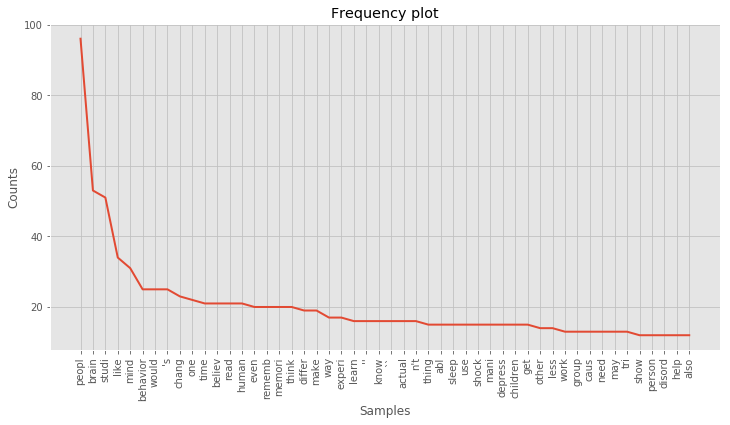

In [18]:
#math_word_frequency.plot(50, cumulative=True)
matplotlib.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
word_frequency.plot(50, 
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2)
plt.show()
#fig.savefig('figs/wordfreq.eps', bbox_inches='tight')

In [19]:
length = [len(separated[i]) for i in range(len(separated))]

In [20]:
np.mean(length)

40.88333333333333

(array([15., 53., 52., 32., 17.,  5.,  2.,  1.,  1.,  2.]),
 array([  2. ,  16.6,  31.2,  45.8,  60.4,  75. ,  89.6, 104.2, 118.8,
        133.4, 148. ]),
 <a list of 10 Patch objects>)

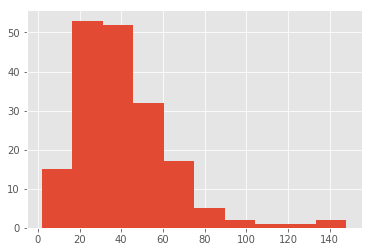

In [21]:
plt.hist(length)

In [22]:
count = 0
for l in length:
    if l > 80:
        count += 1
count # number of people who wrote more than 80 words

8